#  TOR Traffic Characterization 

**----------------------------------------------------------------------------------------------------------------**

**Gal Bar**

**Yishay Garame**

**Naor Maoz**

**----------------------------------------------------------------------------------------------------------------**

# Data Exploration

**Load The Dataset**

In [17]:
#loading data through pandas 
import pandas as pd
all_data_matrix = pd.read_csv("TimeBasedFeatures-10s-Layer2 (1).csv")
all_data_matrix

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,57188,82.161.239.177,110,6,7248168,2.112603e+04,29.110804,34515.085714,2.738693e+05,...,7,0,0,0,0,0,0,0,0,AUDIO
1,10.0.2.15,57188,82.161.239.177,110,6,5157723,1.052790e+03,3.683796,286540.166667,8.788385e+05,...,451,0,0,0,0,0,0,0,0,AUDIO
2,10.0.2.15,57188,82.161.239.177,110,6,41,1.324390e+07,48780.487805,41.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,AUDIO
3,10.0.2.15,57188,82.161.239.177,110,6,9543565,6.373855e+04,83.930900,11929.456250,9.007219e+04,...,5,0,0,0,0,0,0,0,0,AUDIO
4,10.0.2.15,57188,82.161.239.177,110,6,9987537,1.996166e+05,245.806348,4069.900978,2.036573e+04,...,5,0,0,0,0,0,0,0,0,AUDIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,82.161.239.177,110,10.0.2.15,47257,6,7413083,2.991468e+03,8.633385,117667.984127,6.261953e+05,...,217,0,0,0,0,0,0,0,0,CHAT
8040,82.161.239.177,110,10.0.2.15,47257,6,9807892,6.089994e+02,2.039174,516204.842105,1.971833e+06,...,1134,1420,0,1420,1420,8646908,0,8646908,8646908,CHAT
8041,82.161.239.177,110,10.0.2.15,47257,6,9979796,9.793787e+02,3.306681,311868.625000,1.289556e+06,...,371,2241210,0,2241210,2241210,7341693,0,7341693,7341693,CHAT
8042,82.161.239.177,110,10.0.2.15,47257,6,1327,8.183873e+05,2260.738508,663.500000,5.861915e+02,...,0,0,0,0,0,0,0,0,0,CHAT


In [18]:
#printing summary of dataframe using info function of pandas
all_data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source IP          8044 non-null   object 
 1    Source Port       8044 non-null   int64  
 2    Destination IP    8044 non-null   object 
 3    Destination Port  8044 non-null   int64  
 4    Protocol          8044 non-null   int64  
 5    Flow Duration     8044 non-null   int64  
 6    Flow Bytes/s      8044 non-null   float64
 7    Flow Packets/s    8044 non-null   float64
 8    Flow IAT Mean     8044 non-null   float64
 9    Flow IAT Std      8044 non-null   float64
 10   Flow IAT Max      8044 non-null   int64  
 11   Flow IAT Min      8044 non-null   int64  
 12  Fwd IAT Mean       8044 non-null   float64
 13   Fwd IAT Std       8044 non-null   float64
 14   Fwd IAT Max       8044 non-null   int64  
 15   Fwd IAT Min       8044 non-null   int64  
 16  Bwd IAT Mean       8044 

In [19]:
#Print first 5 rows of data
all_data_matrix.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,57188,82.161.239.177,110,6,7248168,2.112603e+04,29.110804,34515.085714,273869.262513,...,7,0,0,0,0,0,0,0,0,AUDIO
1,10.0.2.15,57188,82.161.239.177,110,6,5157723,1.052790e+03,3.683796,286540.166667,878838.525555,...,451,0,0,0,0,0,0,0,0,AUDIO
2,10.0.2.15,57188,82.161.239.177,110,6,41,1.324390e+07,48780.487805,41.000000,0.000000,...,0,0,0,0,0,0,0,0,0,AUDIO
3,10.0.2.15,57188,82.161.239.177,110,6,9543565,6.373855e+04,83.930900,11929.456250,90072.192523,...,5,0,0,0,0,0,0,0,0,AUDIO
4,10.0.2.15,57188,82.161.239.177,110,6,9987537,1.996166e+05,245.806348,4069.900978,20365.733229,...,5,0,0,0,0,0,0,0,0,AUDIO


# Labels#

In [20]:
#Printing the unique value of target variable named as 'label'
all_data_matrix['label'].unique()

array(['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P',
       'VIDEO', 'VOIP'], dtype=object)

**Distribution of the different labels**

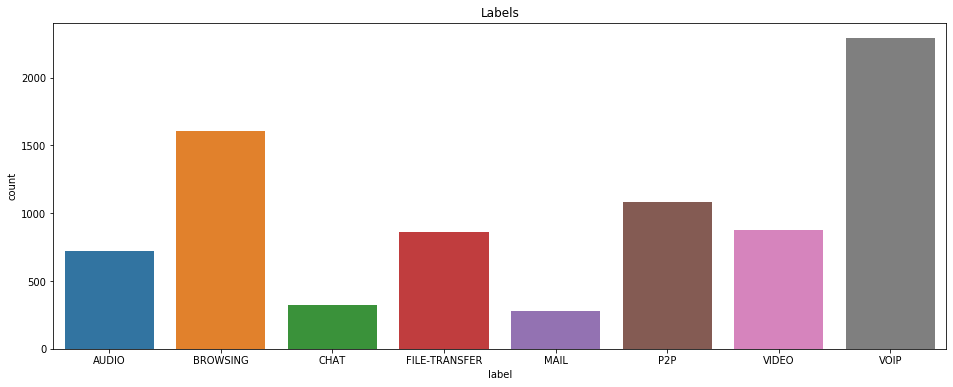

In [21]:
# using seaborn.countplot() method to Show the counts of observations in our target variable using bars.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.title('Labels')
ax = sns.countplot(all_data_matrix['label'],label="Count") 
      # M = 212, B = 357

In [22]:
#Getting core statistics of all the columns using describe function of pandas
all_data_matrix.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,8044.000000,8044.000000,8044.0,8.044000e+03,8.044000e+03,8044.000000,8.044000e+03,8.044000e+03,8.044000e+03,8044.000000,...,8.044000e+03,8.044000e+03,8.044000e+03,8044.0,8.044000e+03,8.044000e+03,8.044000e+03,8044.0,8.044000e+03,8.044000e+03
mean,30505.505719,16767.761313,6.0,8.412146e+06,2.707062e+05,706.836422,1.017038e+05,2.436356e+05,1.214898e+06,65.375062,...,1.139737e+06,5.648311e+04,4.885837e+04,0.0,4.885837e+04,4.885837e+04,5.060547e+05,0.0,5.060547e+05,5.060547e+05
std,22904.243121,22545.613741,0.0,3.062480e+06,1.420024e+06,4391.154798,3.139844e+05,6.377622e+05,2.026831e+06,1766.055329,...,1.918480e+06,5.355551e+05,3.198387e+05,0.0,3.198387e+05,3.198387e+05,1.884005e+06,0.0,1.884005e+06,1.884005e+06
min,110.000000,110.000000,6.0,2.200000e+01,0.000000e+00,0.400114,2.200000e+01,0.000000e+00,2.200000e+01,-2255.000000,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,443.000000,443.000000,6.0,8.906492e+06,1.420822e+04,30.586932,4.444811e+03,1.386636e+04,9.602900e+04,0.000000,...,1.004742e+05,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,38894.000000,443.000000,6.0,9.965426e+06,2.958675e+04,77.540582,1.291837e+04,2.271775e+04,2.264350e+05,8.000000,...,2.169705e+05,2.300000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,51024.000000,41994.000000,6.0,9.989334e+06,1.687313e+05,225.119918,3.518860e+04,1.512991e+05,1.362727e+06,19.000000,...,1.223241e+06,1.890000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,60740.000000,59708.000000,6.0,1.000000e+07,2.710256e+07,90909.090909,3.332380e+06,5.771646e+06,9.996903e+06,127791.000000,...,9.996903e+06,9.996903e+06,4.823748e+06,0.0,4.823748e+06,4.823748e+06,9.996903e+06,0.0,9.996903e+06,9.996903e+06


In [23]:
#printing all the columns in the data frame.
all_data_matrix.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

**Heatmap correlation plot**

checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.
And because visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library.


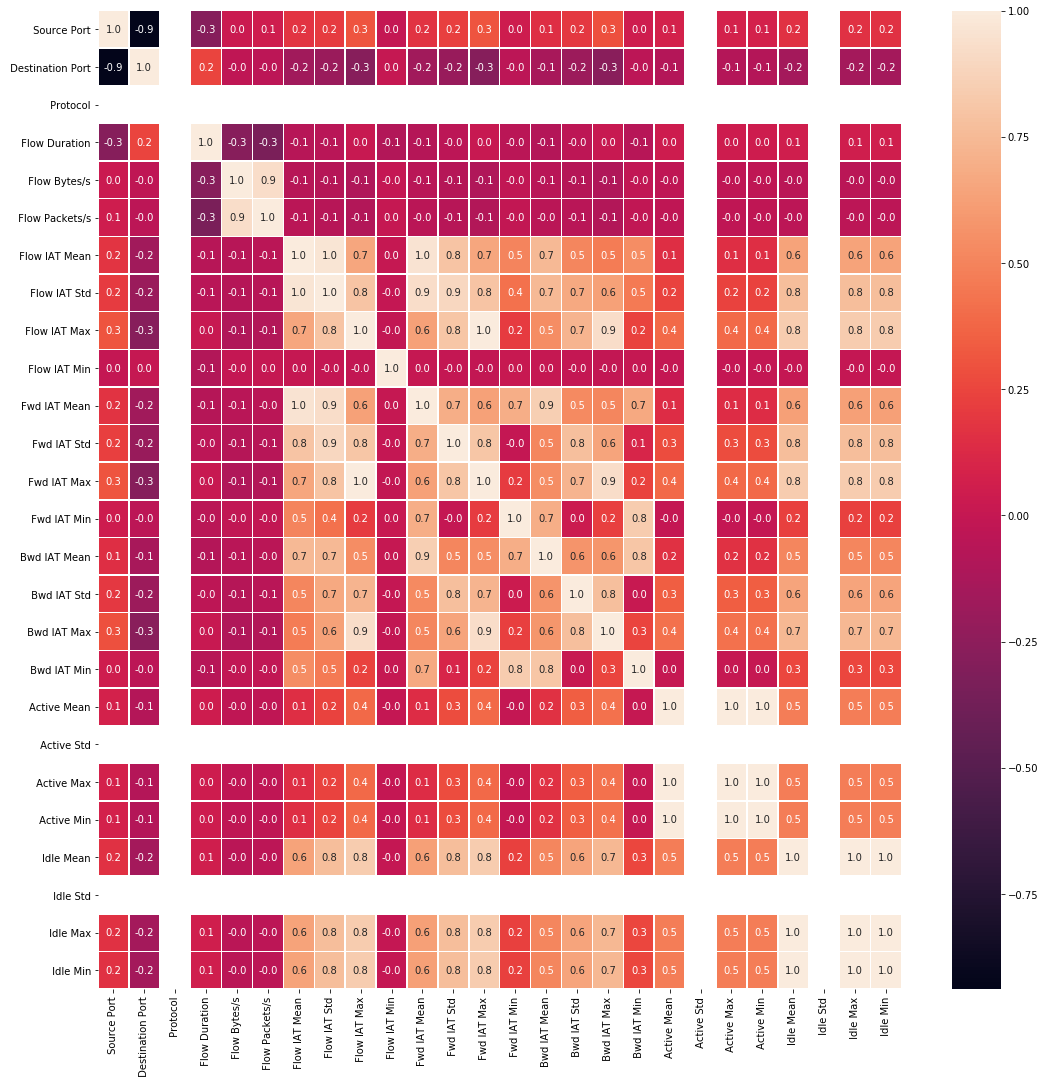

In [24]:
#using seaborn library to plot heatmap correlation between all the features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(all_data_matrix.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [25]:
#So now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.
x=all_data_matrix.drop(columns="label")
y=all_data_matrix['label']
cor_matrix = x.corr().abs()
print(cor_matrix)

                    Source Port   Destination Port   Protocol   Flow Duration  \
 Source Port           1.000000           0.938288        NaN        0.282381   
 Destination Port      0.938288           1.000000        NaN        0.248873   
 Protocol                   NaN                NaN        NaN             NaN   
 Flow Duration         0.282381           0.248873        NaN        1.000000   
 Flow Bytes/s          0.025242           0.023178        NaN        0.278393   
 Flow Packets/s        0.053518           0.043888        NaN        0.333635   
 Flow IAT Mean         0.181326           0.163119        NaN        0.066295   
 Flow IAT Std          0.212197           0.194627        NaN        0.054565   
 Flow IAT Max          0.304814           0.279444        NaN        0.010247   
 Flow IAT Min          0.000479           0.004516        NaN        0.085507   
Fwd IAT Mean           0.173700           0.158631        NaN        0.070611   
 Fwd IAT Std           0.220

**Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.**

# Our Approach - using NMSLIB

**NMSLIB**

Non-Metric Space Library (**NMSLIB**) is an efficient cross-platform similarity search library and a toolkit for evaluation of similarity search methods. The core-library does not have any third-party dependencies.
Gensim’s native Similarity for finding the k nearest neighbors to a vector uses brute force and has linear complexity, albeit with extremely low constant factors.

The retrieved results are exact, which is an overkill in many applications: approximate results retrieved in sub-linear time may be enough.

NMSLIB can find approximate nearest neighbors much faster, similar to Spotify’s Annoy library. Compared to Annoy, NMSLIB has more parameters to control the build and query time and accuracy. NMSLIB often achieves faster and more accurate nearest neighbors search than Annoy.

In [26]:
#installing nmslib module using pip command
!pip install nmslib

In [27]:
import nmslib 
import numpy 
import sys 
import time 
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#reading our csv file and storing it in variable dt
dt = pd.read_csv("TimeBasedFeatures-10s-Layer2 (1).csv")
all_data_matrix=x
df = all_data_matrix.drop('Source IP', axis=1)


**Label Encoder**

To convert categorical text data into model-understandable numerical data, we use the Label Encoder class. So all we have to do, to label encode the first column, is import the LabelEncoder class from the sklearn library, fit and transform the first column of the data, and then replace the existing text data with the new encoded data.

In [28]:
#Encode target labels with value between 0 and n_classes.
df['label']=dt['label']
df = df.drop(' Destination IP', axis=1)
print("all data matrix shape after")
print(all_data_matrix.shape)
# Encode label to numbers
le = preprocessing.LabelEncoder()
le.fit(df.label)
df['label'] = le.transform(df.label)
all_data_matrix = df.to_numpy()



all data matrix shape after
(8044, 28)


**Test_train_split of data**

Using the same dataset for both training and testing leaves room for miscalculations, thus increases the chances of inaccurate predictions.

The train_test_split function allows you to break a dataset with ease while pursuing an ideal model. Also, keep in mind that your model should not be overfitting or underfitting.

In [30]:
(data_matrix_train, query_matrix) = train_test_split(all_data_matrix, test_size = 0.2)
#printing shape of testing data
print(data_matrix_train.shape)
#printing shape of training data
print(query_matrix.shape)





(6435, 27)
(1609, 27)


**nmslib.init**

This function acts act the main entry point into NMS lib. This function should be called first before calling any other method

This function initializes a new NMSLIB index

**hyperParameters used**:	

**space (str optional)** – The metric space to create for this index

**space_params (dict optional)** – Parameters for configuring the space

**method (str optional)** – The index method to use

**data_type (nmslib.DataType optional)** – The type of data to index (dense/sparse/string vectors)

**dist_type (nmslib.DistType optional)** – The type of index to create (float/double/int)

Returns:	
**Return type**:	A new NMSLIB Index.

In [31]:

# We are setting index parameters.
NN = 40 # neighbours 
efC = 100 #the depth of the search 
num_threads = 4
index_time_params = {'NN': NN, 'indexThreadQty': num_threads, 'efConstruction': efC}

#Initialising number of neighbours
K=100

# Space name should correspond to the space name
space_name='kldivgenfast'

# Intitialize the library, specify the space, the type of the vector and add data points
index = nmslib.init(method='sw-graph', space=space_name, data_type=nmslib.DataType.DENSE_VECTOR)
index.addDataPointBatch(data_matrix_train)



6435

**create index nmslib**

Creates the index, and makes it available for querying

**hyperParameters**:

**index_params (dict optional)** – Dictionary of optional parameters to use in indexing

**print_progress (bool optional)** – Whether or not to display progress bar when creating index

In [32]:

# Create an index
start = time.time()
index.createIndex(index_time_params)
end = time.time()
print('Index-time parameters', index_time_params)
print('Indexing time = %f' % (end-start))

# We are setting query-time parameters
efS = 1500
query_time_params = {'efSearch': efS}
print('Setting query-time parameters', query_time_params)
index.setQueryTimeParams(query_time_params)


Index-time parameters {'NN': 40, 'indexThreadQty': 4, 'efConstruction': 100}
Indexing time = 0.256904
Setting query-time parameters {'efSearch': 1500}


In [33]:

# Querying
query_qty = query_matrix.shape[0]
start = time.time()
nbrs = index.knnQueryBatch(query_matrix, k = K, num_threads = num_threads)
end = time.time()
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' %(end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty))


kNN time total=0.587423 (sec), per query=0.000365 (sec), per query adjusted for thread number=0.001460 (sec)


In [34]:

# Computing gold-standard data
print('Computing gold-standard data')
start = time.time()
gs = []

query_qty = query_matrix.shape[0]
data_qty = data_matrix_train.shape[0]

for i in range(query_qty):
    q = query_matrix[i, :]
    d = numpy.log(data_matrix_train * (1.0 / q))
    dist_vals = numpy.sum(data_matrix_train * d, axis=1)
    tmp = [(dist_vals[i], i) for i in range(data_qty)]
    tmp.sort()
    gs.append([tmp[i][1] for i in range(K)])

end = time.time()

print('brute-force kNN time total=%f (sec), per query=%f (sec)' %(end - start, float(end - start) / query_qty))



Computing gold-standard data


C:\Users\Naor\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Naor\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Naor\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Naor\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Naor\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


brute-force kNN time total=8.030115 (sec), per query=0.004991 (sec)


**Recall**

Recall attempts to answer the following question:

What proportion of actual positives was identified correctly?
in our case we have 6 classes so we will find the recall percentage for 6 classes

In [35]:

# Finally computing recall
recall=0.0
for i in range(0, query_qty):
  correct_set = set(gs[i])
  ret_set = set(nbrs[i][0])
  recall = recall + float(len(correct_set.intersection(ret_set))) / len(correct_set)
recall = recall / query_qty
print('kNN recall %f' % recall)


kNN recall 0.015531


In [36]:

# Save a meta index and the data
index.saveIndex('dense_index_kldiv.txt', save_data=True)

# Re-intitialize the library, specify the space, the type of the vector.
newIndex = nmslib.init(method='sw-graph', space=space_name, data_type=nmslib.DataType.DENSE_VECTOR)

# Re-load the index and the data
newIndex.loadIndex('dense_index_kldiv.txt', load_data=True)

# Setting query-time parameters and querying
print('Setting query-time parameters', query_time_params)
newIndex.setQueryTimeParams(query_time_params)

K = 500000000
query_qty = query_matrix.shape[0]
start = time.time()
new_nbrs = newIndex.knnQueryBatch(query_matrix, k = K, num_threads = 1)
end = time.time()
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' 
      %(end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty))


Setting query-time parameters {'efSearch': 1500}
kNN time total=2.424872 (sec), per query=0.001507 (sec), per query adjusted for thread number=0.006028 (sec)


In [37]:

# Finally computing recall
recall=0.0
for i in range(0, query_qty):
    correct_set = set(gs[i])
    ret_set = set(new_nbrs[i][0])
    recall = recall + float(len(correct_set.intersection(ret_set))) / len(correct_set)
recall = recall / query_qty
print()
print('Final Value of Recall : %f' % recall)
print("DONE")


Final Value of Recall : 0.933120
DONE
